In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import (cross_val_score)
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()

Populating the interactive namespace from numpy and matplotlib


In [45]:
df = pd.read_csv('complete_web_scraping.csv')

In [46]:
#df.info()
df.shape

(1020, 74)

## Fix features to reduce complexity of model

In [47]:
df['release date']

0       December 16, 2015
1          April 24, 2019
2       December 16, 2009
3       February 13, 2018
4          April 25, 2018
              ...        
1015     October 14, 2015
1016    December 20, 2012
1017     January 17, 2008
1018     February 5, 2010
1019        June 12, 2019
Name: release date, Length: 1020, dtype: object

In [48]:
import datetime as dt

date_list = []
for date_str in df['release date']:
    d = datetime.datetime.strptime(date_str, '%B %d, %Y')
    date_list.append(d)

In [49]:
df['release date'] = date_list

In [50]:
df['release date']

0      2015-12-16
1      2019-04-24
2      2009-12-16
3      2018-02-13
4      2018-04-25
          ...    
1015   2015-10-14
1016   2012-12-20
1017   2008-01-17
1018   2010-02-05
1019   2019-06-12
Name: release date, Length: 1020, dtype: datetime64[ns]

In [51]:
df['release date'] = df['release date'].astype(str)

In [52]:
df['release date'] = df['release date'].str.replace("-","").astype(float)

In [53]:
df['release date']

0       20151216.0
1       20190424.0
2       20091216.0
3       20180213.0
4       20180425.0
           ...    
1015    20151014.0
1016    20121220.0
1017    20080117.0
1018    20100205.0
1019    20190612.0
Name: release date, Length: 1020, dtype: float64

In [54]:
df.head()

,link_stub,rank,title,lifetime_gross,year,actor_actress,budget,genre,runtime (mins),release date,...,distributor_USA Films,distributor_United Artists,distributor_United Artists Releasing,distributor_Universal Pictures,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.,rating_G,rating_PG,rating_PG-13,rating_R
0,/title/tt2488496/?ref_=bo_cso_table_1,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,Daisy Ridley,245000000,"['Action', 'Adventure', 'Sci-Fi']",138.0,20151216.0,...,0,0,0,0,1,0,0,0,1,0
1,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,"$858,373,000",2019,Robert Downey Jr.,356000000,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181.0,20190424.0,...,0,0,0,0,1,0,0,0,1,0
2,/title/tt0499549/?ref_=bo_cso_table_3,3,Avatar,"$760,507,625",2009,Sam Worthington,237000000,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",162.0,20091216.0,...,0,0,0,0,0,0,0,0,1,0
3,/title/tt1825683/?ref_=bo_cso_table_4,4,Black Panther,"$700,426,566",2018,Chadwick Boseman,72067774,"['Action', 'Adventure', 'Sci-Fi']",134.0,20180213.0,...,0,0,0,0,1,0,0,0,1,0
4,/title/tt4154756/?ref_=bo_cso_table_5,5,Avengers: Infinity War,"$678,815,482",2018,Robert Downey Jr.,72067774,"['Action', 'Adventure', 'Sci-Fi']",149.0,20180425.0,...,0,0,0,0,1,0,0,0,1,0


In [55]:
X, y = df.drop(['lifetime_gross','opening gross','rank','title','link_stub','genre','actor_actress'], axis=1), df['opening gross']

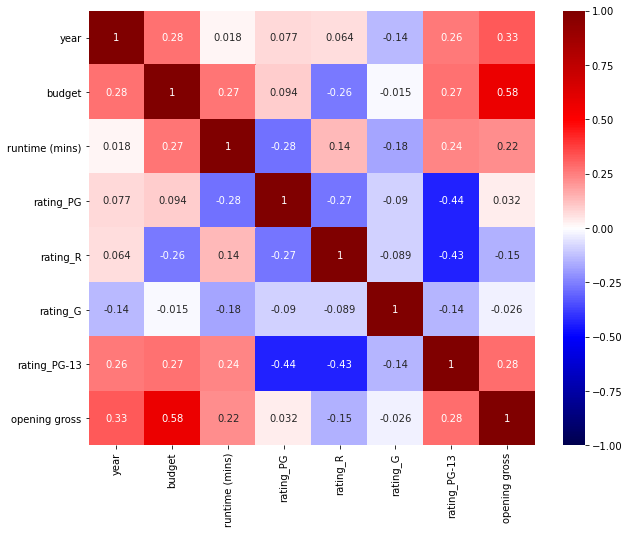

In [56]:
#heatmap
x = df[['year','budget','runtime (mins)','rating_PG','rating_R','rating_G','rating_PG-13','opening gross']]

plt.subplots(figsize=(10,8))
sns.heatmap(x.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.savefig("movie_features_heatmap.png")

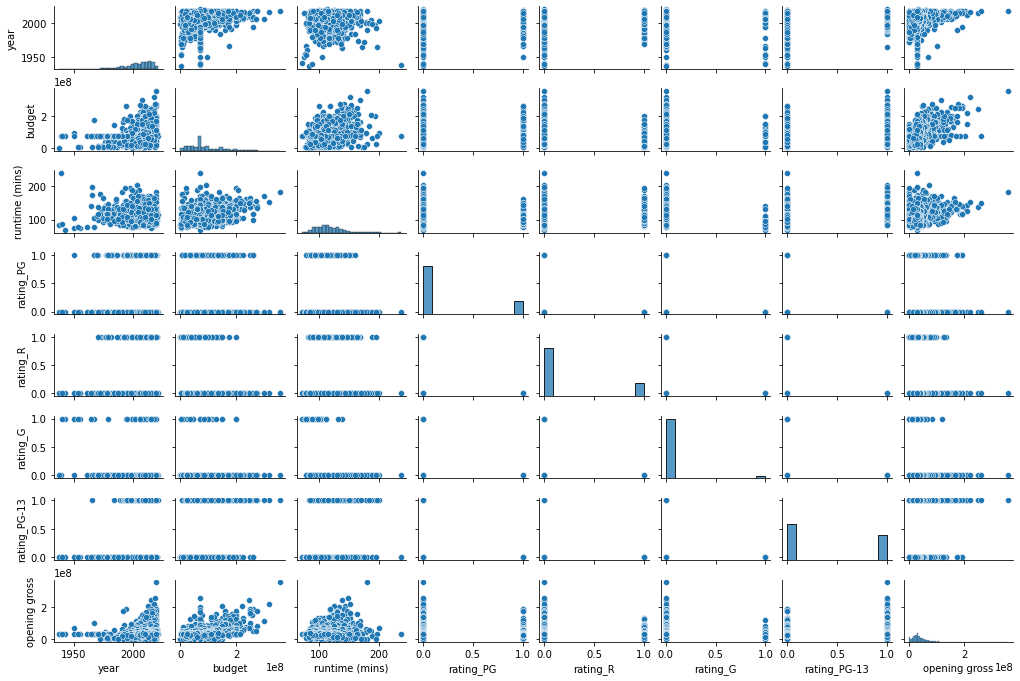

In [57]:
#pairplot
sns.pairplot(x, height=1.2, aspect=1.5);
plt.savefig("movie_features_pairplot.png")

## Create Baseline Model
Split data. Preform simple linear regression model

In [58]:
# split data

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=8)

In [60]:
#60%
X_train.shape

(612, 67)

In [61]:
#20%
X_val.shape

(204, 67)

In [62]:
#20%
X_test.shape

(204, 67)

In [63]:
#create basic linear reg plot (baseline)
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.499
Linear Regression val R^2: 0.395


In [65]:
y_pred = lm.predict(X_val)

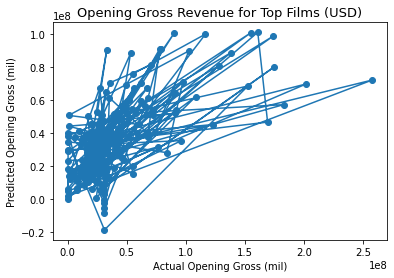

In [66]:
plt.scatter(y_val, y_pred)
plt.plot(y_val, y_pred)
plt.xlabel("Actual Opening Gross (mil)")
plt.ylabel("Predicted Opening Gross (mil)")
plt.title("Opening Gross Revenue for Top Films (USD)", fontsize=13)

plt.savefig('Open_Gross_Rev.png')

/Users/sheraleelovejoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


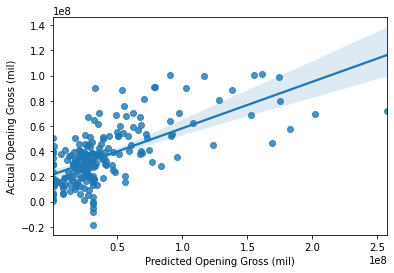

In [67]:
lm_plot = sns.regplot(y_val, y_pred)
lm_plot.set_xlabel("Predicted Opening Gross (mil)")
lm_plot.set_ylabel("Actual Opening Gross (mil)")

plt.savefig('simple_lm_plot.png')

## Compare models using cross validation

In [68]:
#cross val of lm

lm_train_scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='r2')
lm_val_scores = cross_val_score(lm, X_val, y_val, cv=5, scoring='r2')

print(f'Linear Regression CV train R^2: {round(np.mean(lm_train_scores),3)}')
print(f'Linear Regression CV val R^2: {round(np.mean(lm_val_scores),3)}')

Linear Regression CV train R^2: 0.402
Linear Regression CV val R^2: -0.262


In [69]:
#ridge cv
scaler = StandardScaler()
alphavec = 10**np.linspace(-2,2,200)

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

ridge = RidgeCV(alphas=alphavec)

In [70]:
ridge.fit(X_train_scaled, y_train)

print(f'Ridge Regression train R^2: {ridge.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {ridge.score(X_val_scaled, y_val):.3f}')

Ridge Regression train R^2: 0.490
Ridge Regression val R^2: 0.399


In [71]:
#scale X matrix then lasso CV
scaler.fit(X_train.values)

# Scale the Predictors on both the train
X_train_lasso = scaler.transform(X_train.values)
X_val_lasso = scaler.transform(X_val.values)

In [72]:
#find the best alpha, refit model on all the data with alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
lasso_model.fit(X_train_lasso, y_train)
las = lasso_model.fit(X_train_lasso, y_train)

print(f'Lasso CV Regression train R^2: {lasso_model.score(X_train_lasso, y_train):.3f}')
print(f'Lasso CV Regression val R^2: {lasso_model.score(X_val_lasso, y_val):.3f}')

Lasso CV Regression train R^2: 0.499
Lasso CV Regression val R^2: 0.396


In [75]:
list(zip(X_train.columns, las.coef_))

[('year', -2122485.850434461),
 ('budget', 14033965.398966804),
 ('runtime (mins)', 3267123.4865281684),
 ('release date', 8077743.087469909),
 ('Action', -2307534.8925986444),
 ('Adventure', 2050605.0989707191),
 ('Animation', -7969.878845706785),
 ('Biography', -2519084.7932918887),
 ('Comedy', -2146365.60880176),
 ('Crime', -78312.76518732077),
 ('Documentary', 1295671.0295989318),
 ('Drama', -3496617.025120412),
 ('Family', 895352.439981657),
 ('Fantasy', -1301328.4973898064),
 ('History', -2313112.3061503447),
 ('Horror', 184958.6527930785),
 ('Music', 197239.02496743717),
 ('Musical', 1097923.9701740553),
 ('Mystery', 492104.77331845823),
 ('Romance', -1236755.052875267),
 ('Sci-Fi', 3210583.034676725),
 ('Short', 0.0),
 ('Sport', -996320.6653326428),
 ('Thriller', -2118631.3445266807),
 ('War', -1487813.9033698305),
 ('Western', -1533799.6279941904),
 ('distributor_American International Pictures (AIP)', 0.0),
 ('distributor_Artisan Entertainment', 0.0),
 ('distributor_Columbia 

### Drop features with 0 coefficient from lasso results

In [76]:
X, y = df.drop(['lifetime_gross','opening gross','rank','title','link_stub','genre','actor_actress','distributor_USA Films','distributor_Roadside Attractions','distributor_Relativity Media','distributor_Newmarket Films','distributor_MacGillivray Freeman Films','distributor_IFC Films','distributor_FilmDistrict','distributor_Artisan Entertainment','distributor_American International Pictures (AIP)','Short'], axis=1), df['opening gross']

In [77]:
# split data

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=8)

## Create diagnostic plots

In [36]:
import scipy.stats as stats
import statsmodels.api as sm

In [41]:
y_pred = ridge.predict(X_val)
y_true = y_val
resid = y_true - y_pred
model = sm.OLS(y, sm.add_constant(X)) 
fit = model.fit()

In [42]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

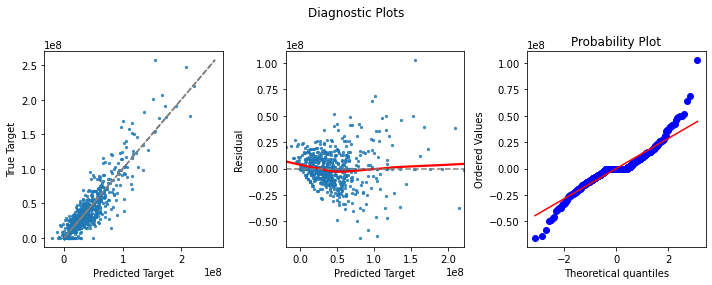

In [43]:
diagnostic_plots(fit.fittedvalues, y, fit.resid)

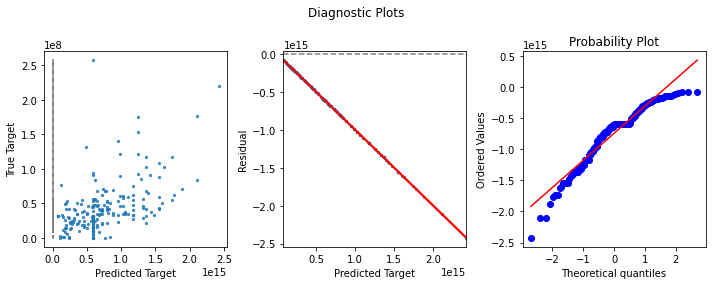

In [44]:
diagnostic_plots(y_pred, y_true, resid)

### Feature Eng

In [79]:
df['year_sq'] = df['year']**2

In [80]:
df.head()

,link_stub,rank,title,lifetime_gross,year,actor_actress,budget,genre,runtime (mins),release date,...,distributor_United Artists,distributor_United Artists Releasing,distributor_Universal Pictures,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.,rating_G,rating_PG,rating_PG-13,rating_R,year_sq
0,/title/tt2488496/?ref_=bo_cso_table_1,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,Daisy Ridley,245000000,"['Action', 'Adventure', 'Sci-Fi']",138.0,20151216.0,...,0,0,0,1,0,0,0,1,0,4060225
1,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,"$858,373,000",2019,Robert Downey Jr.,356000000,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181.0,20190424.0,...,0,0,0,1,0,0,0,1,0,4076361
2,/title/tt0499549/?ref_=bo_cso_table_3,3,Avatar,"$760,507,625",2009,Sam Worthington,237000000,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",162.0,20091216.0,...,0,0,0,0,0,0,0,1,0,4036081
3,/title/tt1825683/?ref_=bo_cso_table_4,4,Black Panther,"$700,426,566",2018,Chadwick Boseman,72067774,"['Action', 'Adventure', 'Sci-Fi']",134.0,20180213.0,...,0,0,0,1,0,0,0,1,0,4072324
4,/title/tt4154756/?ref_=bo_cso_table_5,5,Avengers: Infinity War,"$678,815,482",2018,Robert Downey Jr.,72067774,"['Action', 'Adventure', 'Sci-Fi']",149.0,20180425.0,...,0,0,0,1,0,0,0,1,0,4072324


In [81]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=8)

In [83]:
scaler = StandardScaler()
alphavec = 10**np.linspace(-2,2,200)

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

ridge = RidgeCV(alphas=alphavec)

In [84]:
ridge.fit(X_train_scaled, y_train)

print(f'Ridge Regression train R^2: {ridge.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {ridge.score(X_val_scaled, y_val):.3f}')

Ridge Regression train R^2: 0.432
Ridge Regression val R^2: 0.434


In [85]:
preds = ridge.predict(X_val)

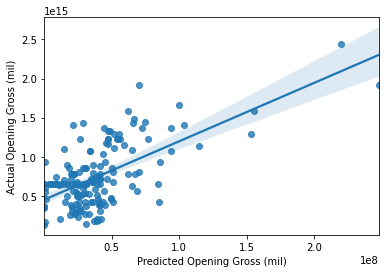

In [86]:
fe_ridge_plot = sns.regplot(y_val, preds)
fe_ridge_plot.set_xlabel("Predicted Opening Gross (mil)")
fe_ridge_plot.set_ylabel("Actual Opening Gross (mil)")

plt.savefig('new_FE_ridge_plot.png')

In [87]:
'''alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('ridge', RidgeCV(alphas = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)'''

"alphalist = 10**(np.linspace(-2,2,200))\nerr_vec_val = np.zeros(len(alphalist))\nerr_vec_train = np.zeros(len(alphalist))\n\nfor i,curr_alpha in enumerate(alphalist):\n\n    # note the use of a new sklearn utility: Pipeline to pack\n    # multiple modeling steps into one fitting process \n    steps = [('standardize', StandardScaler()), \n             ('ridge', RidgeCV(alphas = curr_alpha))]\n\n    pipe = Pipeline(steps)\n    pipe.fit(X_train.loc[:,selected_columns].values, y_train)\n    \n    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)\n    err_vec_val[i] = mae(y_val, val_set_pred)"

In [88]:
'''#plot the curve of validation error as alpha changes

plt.plot(np.log10(alphavec), err_vec_val)'''

'#plot the curve of validation error as alpha changes\n\nplt.plot(np.log10(alphavec), err_vec_val)'

In [89]:
'''## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)'''

'## This is the minimum error achieved on the validation set \n## across the different alpha values we tried\n\nnp.min(err_vec_val)'

In [90]:
'''## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]'''

'## This is the value of alpha that gave us the lowest error\nalphalist[np.argmin(err_vec_val)]'

## Refit model to test data for final results
Also, calculate RMSE. Plot model.

In [91]:
'''X_refit = scaler.fit_transform(X.values)
ridge.fit(X_refit, y)
print(round(ridge.score(X_refit, y),3))'''

'X_refit = scaler.fit_transform(X.values)\nridge.fit(X_refit, y)\nprint(round(ridge.score(X_refit, y),3))'

In [92]:
#refit to model then plot
X_test_scaled = scaler.transform(X_test.values)
ridge.fit(X_test_scaled, y_test)
print(round(ridge.score(X_test_scaled, y_test),3))

0.611


In [93]:
ridge.coef_
list(zip(X.columns, ridge.coef_))

[('year', 2237729.615208365),
 ('budget', 8176559.777617274),
 ('runtime (mins)', 3393198.7598530636),
 ('release date', 5106956.765289664),
 ('Action', -59361.23481096234),
 ('Adventure', 2716935.4353503785),
 ('Animation', -466228.422478665),
 ('Biography', -1675686.408703059),
 ('Comedy', -2970875.1394367535),
 ('Crime', -1648099.8562520926),
 ('Documentary', 1.050131637030211e-25),
 ('Drama', -2528986.784623578),
 ('Family', -276904.3724312498),
 ('Fantasy', 1779042.389047287),
 ('History', -1299886.5929261553),
 ('Horror', 635309.703727828),
 ('Music', 291922.58618722355),
 ('Musical', 1400031.3454967253),
 ('Mystery', -13952.38463816652),
 ('Romance', -1363244.0997529114),
 ('Sci-Fi', 2344548.8294788636),
 ('Sport', -394048.93254191824),
 ('Thriller', -988974.6393745102),
 ('War', -1313889.2101036105),
 ('Western', -1277160.4624503024),
 ('distributor_Columbia Pictures', -412600.0024753544),
 ('distributor_Dimension Films', 28095.6086150271),
 ('distributor_DreamWorks', 2302871.5

In [94]:
# Make predictions on the test set using the new model
preds = ridge.predict(X_test_scaled)

In [95]:
#rmse; better to talk about performance ('error = predictions were off on avg by $')
def RMSE(actuals, preds): 
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_test,preds)

24069151.035885274

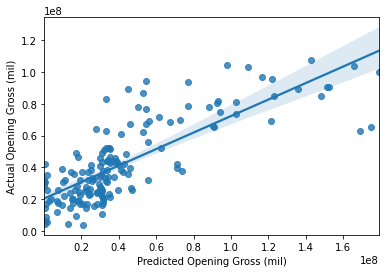

In [96]:
final_plot = sns.regplot(y_test, preds)
final_plot.set_xlabel("Predicted Opening Gross (mil)")
final_plot.set_ylabel("Actual Opening Gross (mil)")

plt.savefig('final_plot.png')

In [97]:
df.head()

,link_stub,rank,title,lifetime_gross,year,actor_actress,budget,genre,runtime (mins),release date,...,distributor_United Artists,distributor_United Artists Releasing,distributor_Universal Pictures,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.,rating_G,rating_PG,rating_PG-13,rating_R,year_sq
0,/title/tt2488496/?ref_=bo_cso_table_1,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,Daisy Ridley,245000000,"['Action', 'Adventure', 'Sci-Fi']",138.0,20151216.0,...,0,0,0,1,0,0,0,1,0,4060225
1,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,"$858,373,000",2019,Robert Downey Jr.,356000000,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181.0,20190424.0,...,0,0,0,1,0,0,0,1,0,4076361
2,/title/tt0499549/?ref_=bo_cso_table_3,3,Avatar,"$760,507,625",2009,Sam Worthington,237000000,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",162.0,20091216.0,...,0,0,0,0,0,0,0,1,0,4036081
3,/title/tt1825683/?ref_=bo_cso_table_4,4,Black Panther,"$700,426,566",2018,Chadwick Boseman,72067774,"['Action', 'Adventure', 'Sci-Fi']",134.0,20180213.0,...,0,0,0,1,0,0,0,1,0,4072324
4,/title/tt4154756/?ref_=bo_cso_table_5,5,Avengers: Infinity War,"$678,815,482",2018,Robert Downey Jr.,72067774,"['Action', 'Adventure', 'Sci-Fi']",149.0,20180425.0,...,0,0,0,1,0,0,0,1,0,4072324


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   link_stub                                          1020 non-null   object 
 1   rank                                               1020 non-null   object 
 2   title                                              1020 non-null   object 
 3   lifetime_gross                                     1020 non-null   object 
 4   year                                               1020 non-null   int64  
 5   actor_actress                                      1020 non-null   object 
 6   budget                                             1020 non-null   int64  
 7   genre                                              1020 non-null   object 
 8   runtime (mins)                                     1020 non-null   float64
 9   release 

In [99]:
scaler = StandardScaler()
alphavec = 10**np.linspace(-2,2,200)
ridge = RidgeCV(alphas=alphavec)

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 777 to 588
Data columns (total 57 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   year                                             652 non-null    int64  
 1   budget                                           652 non-null    int64  
 2   runtime (mins)                                   652 non-null    float64
 3   release date                                     652 non-null    float64
 4   Action                                           652 non-null    int64  
 5   Adventure                                        652 non-null    int64  
 6   Animation                                        652 non-null    int64  
 7   Biography                                        652 non-null    int64  
 8   Comedy                                           652 non-null    int64  
 9   Crime                         

In [114]:
X_movie = [[1998,140000000,151.0,19980701.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3992004]]

In [115]:
X_test_scaled = scaler.fit_transform(X_test.values)
ridge.fit(X_test_scaled, y_test)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]))

In [116]:
X_movie = scaler.fit_transform(X_movie)

In [117]:
ridge.fit(X_test_scaled, y_test)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]))

In [118]:
#test on movie
movie_pred = ridge.predict(X_movie)

In [119]:
print(movie_pred)

[42560496.17682931]


In [120]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y_test,preds)

16548730.471786054